In [43]:
import pandas as pd
import numpy as np

df = pd.read_csv('D:/RANDOM/IMDB 50k Dataset archive/IMDB.csv')

In [44]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [45]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# Step to pefrom creating model to idetify model
- **Gathering Data**
- **Cleaning the Data** 
     - lowercasing
     - removing leading & trailing spaces
     - removing html tags
     - removing urls
     - expanding abbrivations Ex.doesn't,you'll
     - spelling correction
     - puctuations
     - remove special characters
- **Preprocessing**
    - tokenization
    - stopword removal Ex I, have (this words dosen;t have contribute in sentence building) 
    - stremming Ex. dance danced dancing converted into dance dance dance    
- **EDA**
- **Making features** (Making features like adding new columns that are help to create models
- **Vectorization** (Converting text into numbers using different techniques like Bag Of Words,TFTDF, word2web 
- **Modeling** (Applying different ML algorithm and DL techniques on models and figureout the best technique)
- **Evaluation**(Selecting best Model)
- **Deployment**
- **Monitoring**


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [47]:
df.duplicated().sum()

418

In [48]:
df = df.drop_duplicates()

In [49]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [50]:
# 1. Cleaning
# lowercase
df['review'] = df['review'].str.lower()
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [51]:
# remove whitespaces
df['review'] = df['review'].str.strip()

In [52]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [53]:
import re
def remove_tags(data):
    data = re.sub(r'<.*?>','', data)
    return data
df['review'] = df['review'].apply(remove_tags)

In [54]:
df['review'].str.replace(r'<.*?>', '')

C:\Users\Akash Pagi\AppData\Local\Temp\ipykernel_4440\1117704047.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'].str.replace(r'<.*?>', '')


0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [68]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [56]:
# removing urls
import re

def remove_url(data):
    data = re.sub(r'https?//\S+|www\.\S+','',data)
    return data

#df['review'] = df['review'].apply(remove_url)

In [57]:
df[df['review'].str.contains(r"https?//\S+|www\.\S+")]

,review,sentiment
742,mario lewis of the competitive enterprise inst...,negative
907,following directly from where the story left o...,positive
1137,i really think i should make my case and have ...,positive
1141,this show has to be my favorite out of all the...,positive
1972,the basic plot of 'marigold' boasts of a roman...,negative
...,...,...
48363,this movie contains the worst acting performan...,negative
49063,"trick or treat, quickie review this zany romp ...",positive
49596,"this is absolutely the best 80s cartoon ever, ...",positive
49637,if you liked the richard chamberlain version o...,positive


In [65]:
# checking url pattern
import numpy as np
df[df['review'].str.contains(r"https?//\S+|www\.\S+")].iloc[4].values

array(["the basic plot of 'marigold' boasts of a romantic comedy wherein the film industry is kept as a backdrop. an american actress marigold, played by ali carter gets stuck in india. worse that, she is out of money. she then decides to play a small role in a bollywood musical, so that she can earn enough money to get back to her nation. here she gets to meet indian choreographer prem, played by salman khan. basically, the movie fails at the script level. just by calling a film a hollywood venture does not guarantee quality cinema. marigold stands out as the best example. the art direction is weak and outdated. musically, marigold turns out to be a dud. shankar-ehsaan-loy's is far from being acknowledged as a decent hear. actingwise, salman delivers of his most amateurish performances till date. ali larter is good and has immense screen presence. performance wise too, she is good.one can also find good reviews regarding this movie at http://www.comingsoon.net/films.php?id=36310",
   

In [59]:
# expanding abbvr

# expand 

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data


In [60]:
df['review'] = df['review'].apply(remove_abb)
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    I am going to have to disagree with the previo...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [61]:
# libarys to import for spelling corrections
!pip install textblob
!python -m textblob.download_corpora

Defaulting to user installation because normal site-packages is not writeable
Finished.


[nltk_data] Downloading package brown to C:\Users\Akash
[nltk_data]     Pagi\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Akash
[nltk_data]     Pagi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Akash
[nltk_data]     Pagi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Akash Pagi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\Akash
[nltk_data]     Pagi\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Akash
[nltk_data]     Pagi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_

In [63]:
# Spelling correction
from textblob import TextBlob
def spelling_correction(text):
    return TextBlob(text).correct().string
df['review'].apply(spelling_correction).head()


ModuleNotFoundError: No module named 'textblob'

In [ ]:
# puctuations
import string

def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
    return text

df['review'] = df['review'].apply(remove_punctuation)
df['review']

In [ ]:
# Remove special characters

In [ ]:
# 2. Preprocessing

# Tokenization
from nltk.tokenize import word_tokenize
import pandas as pd

# Assuming df is your DataFrame with a 'review' column
df['tokenized_review'] = df['review'].apply(word_tokenize)
df.head()

In [ ]:
# Stop word removal
from nltk.corpus import stopwords

def remove_stopwords(text):
    l = []
    for word in text:
        if word not in stopwords.words('english'):
            l.append(word)
    return l

In [ ]:
df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)

In [ ]:
df.head()

In [ ]:
# Replacing the review column with tokenized coulmn
df['review'] = df['tokenized_review'].apply(lambda x:' '.join(x))

In [ ]:
df.head()

In [ ]:
# EDA and Feature Engineering (Try to build features so it will in solve the upcomming problenms related to ML models)

#WordCloud

In [ ]:
#Distribution of thext lenght / word count
df['char_length'] = df['review'].str.len()
df

In [ ]:
df['words_length'] = df['tokenized_review'].apply(len)
df

In [ ]:
import seaborn as sns
sns.distplot(df['char_length'])

In [ ]:
sns.distplot(df[df['sentiment'] == 'positive']['char_length'])
sns.distplot(df[df['sentiment'] == 'negative']['char_length'])

In [ ]:
sns.distplot(df[df['sentiment'] == 'positive']['words_length'])
sns.distplot(df[df['sentiment'] == 'negative']['words_length'])

#### Common unigrams/bigrams/trigrams

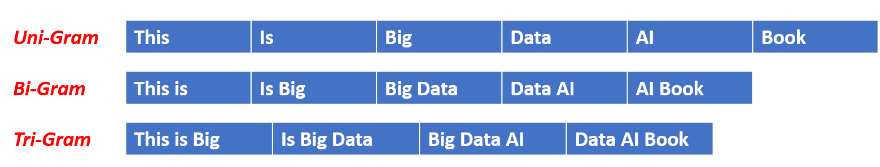

In [ ]:
# ngrams 
df['tokenized_review'].sum()

In [ ]:
from nltk import ngrams
# bigram
pd.Series(ngrams(df['tokenized_review']).sum(),2).values_counts()

In [ ]:
# trigram
pd.Series(ngrams(df['tokenized_review']).sum(),3).values_counts()

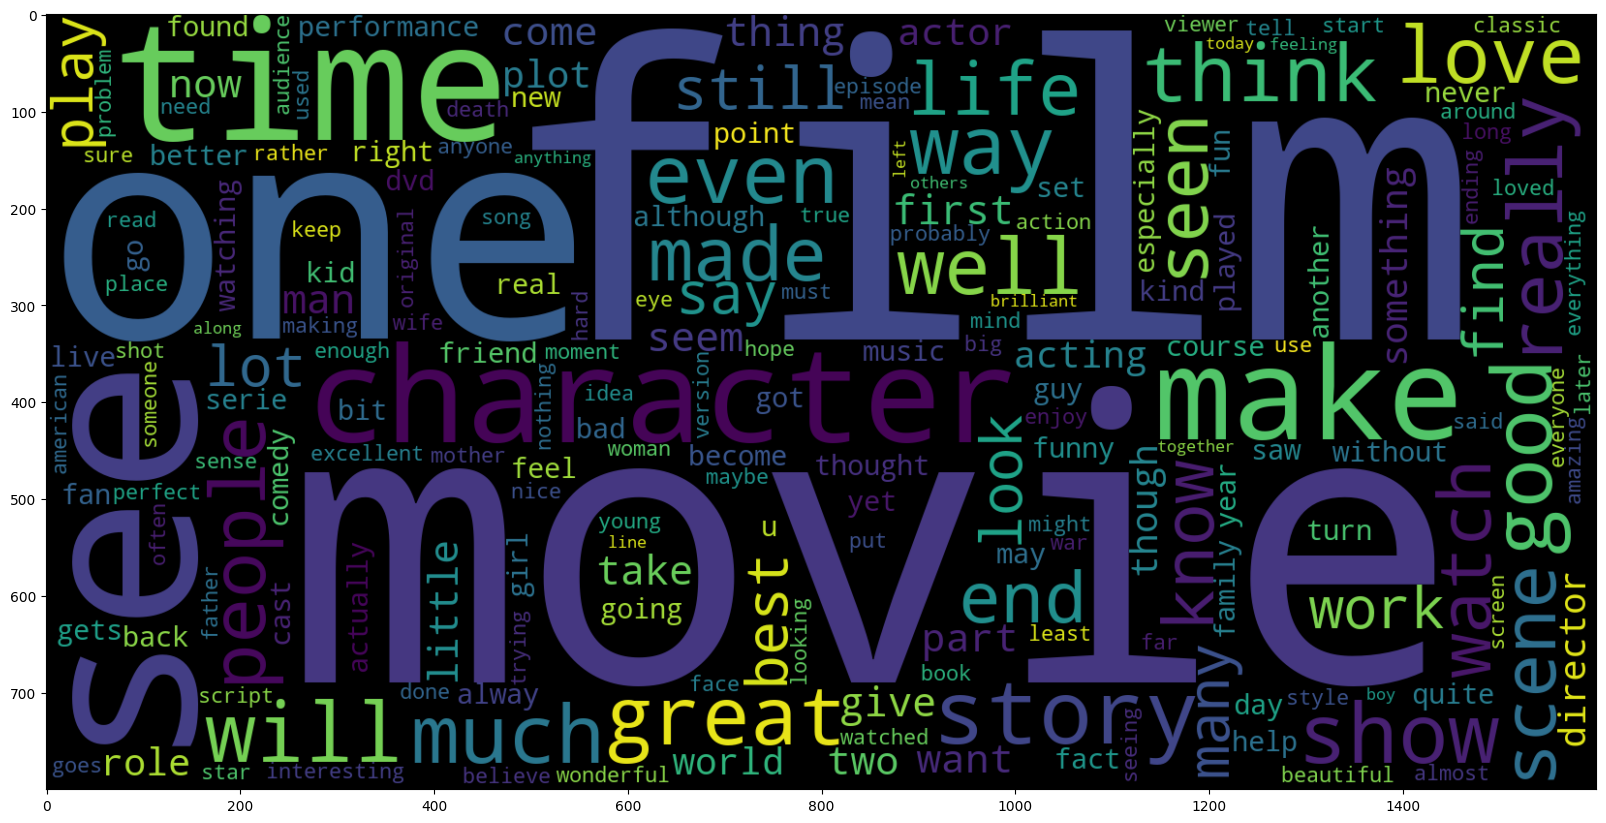

In [78]:
# WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to get the text data corresponding to 'positive' sentiment
positive_sentiments = ' '.join(df[df['sentiment'] == 'positive']['review'])

# Generate the WordCloud
wordcloud = WordCloud(width=1600, height=800).generate(positive_sentiments)

# Display the WordCloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


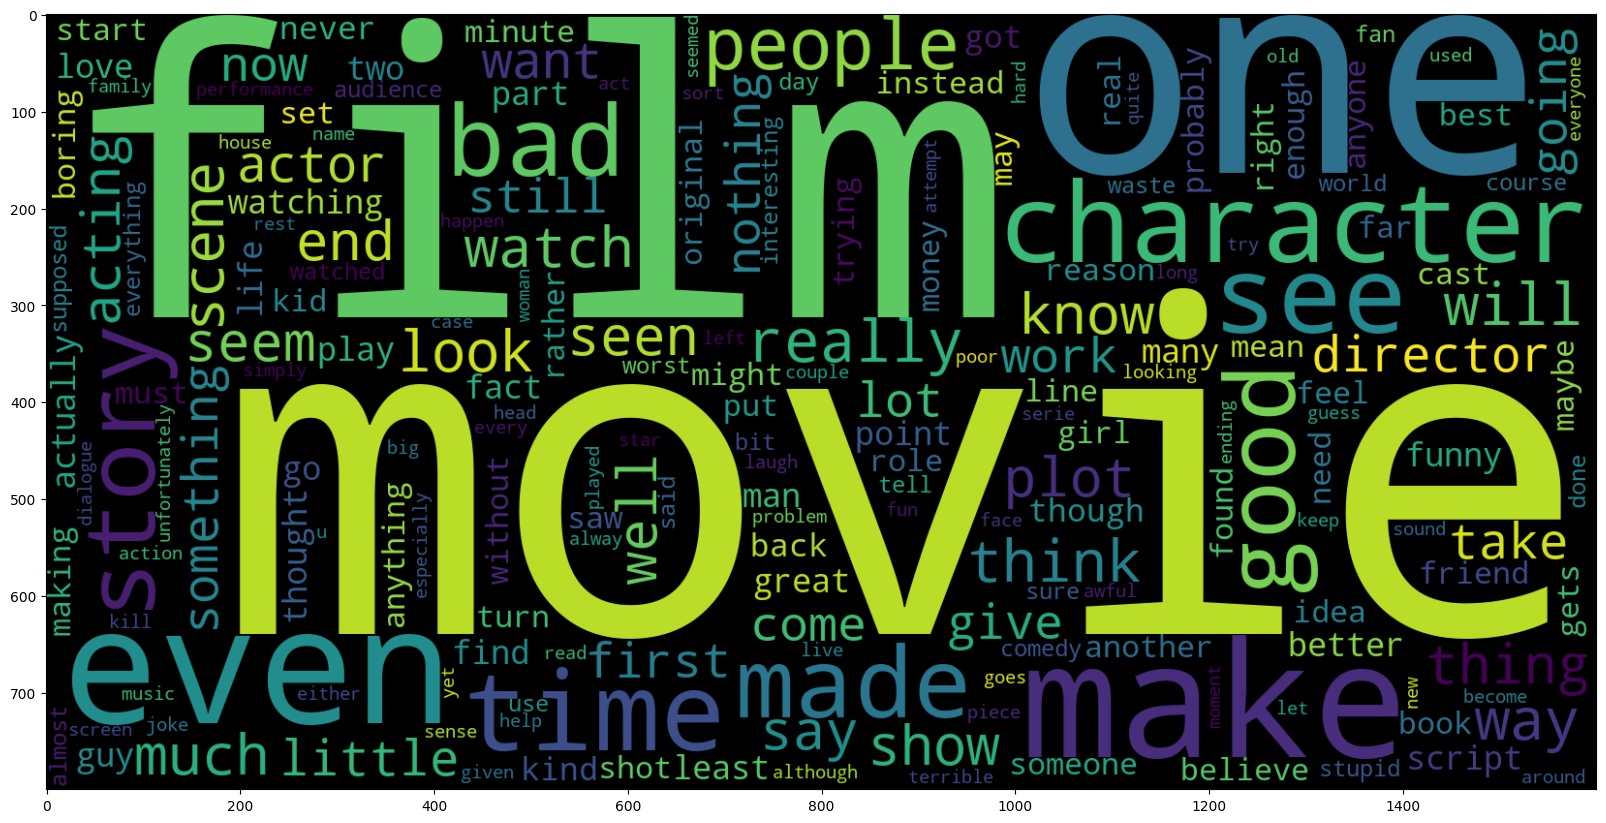

In [79]:
# Filter the DataFrame to get the text data corresponding to 'positive' sentiment
positive_sentiments = ' '.join(df[df['sentiment'] == 'negative']['review'])

# Generate the WordCloud
wordcloud = WordCloud(width=1600, height=800).generate(positive_sentiments)

# Display the WordCloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


In [81]:
# Bag of Words (BoW)

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,1)) # bigram = (1,2) # trigram = (1,3)
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names())

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [82]:
bag_of_words

,00,000,10,100,11,12,13,13th,14,15,...,you,young,younger,your,yourself,youth,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49577,0,0,1,0,0,0,0,0,0,0,...,2,0,0,1,3,0,0,0,0,0
49578,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
49579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49580,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [83]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

In [84]:
pca_result.shape

(49582, 2)

<AxesSubplot: >

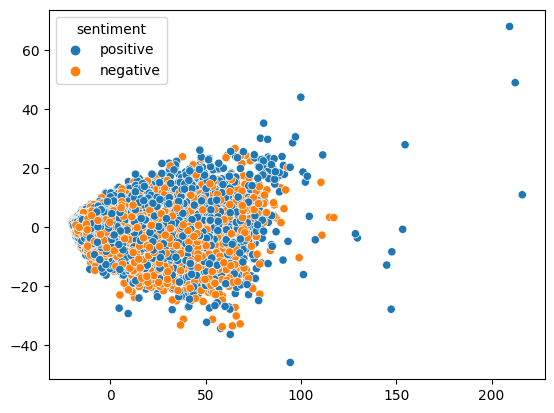

In [88]:
import seaborn as sns
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['sentiment'])